In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import datasets, layers, models, optimizers, initializers, regularizers, preprocessing, callbacks
from google.colab import files
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
model = models.Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
NAG = optimizers.SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)

batch = 128
epoch = 20

model.compile(optimizer= NAG ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stop = callbacks.EarlyStopping(monitor='loss', patience=3, verbose=2)

history = model.fit(train_images, train_labels,
                    epochs=epoch, verbose = 2,
                    batch_size=batch,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/20
391/391 - 48s - loss: 1.5262 - accuracy: 0.4371 - val_loss: 0.8873 - val_accuracy: 0.6848
Epoch 2/20
391/391 - 47s - loss: 0.5788 - accuracy: 0.8005 - val_loss: 0.5731 - val_accuracy: 0.8031
Epoch 3/20
391/391 - 47s - loss: 0.3919 - accuracy: 0.8664 - val_loss: 0.4632 - val_accuracy: 0.8442
Epoch 4/20
391/391 - 47s - loss: 0.2774 - accuracy: 0.9037 - val_loss: 0.4578 - val_accuracy: 0.8547
Epoch 5/20
391/391 - 47s - loss: 0.1898 - accuracy: 0.9357 - val_loss: 0.4906 - val_accuracy: 0.8501
Epoch 6/20
391/391 - 47s - loss: 0.1190 - accuracy: 0.9600 - val_loss: 0.4787 - val_accuracy: 0.8616
Epoch 7/20
391/391 - 47s - loss: 0.0758 - accuracy: 0.9748 - val_loss: 0.5413 - val_accuracy: 0.8644
Epoch 8/20
391/391 - 47s - loss: 0.0507 - accuracy: 0.9824 - val_loss: 0.5827 - val_accuracy: 0.8598
Epoch 9/20
391/391 - 47s - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.6517 - val_accuracy: 0.8600
Epoch 10/20
391/391 - 47s - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.7732 - val_accura

313/313 - 6s - loss: 0.8885 - accuracy: 0.8751


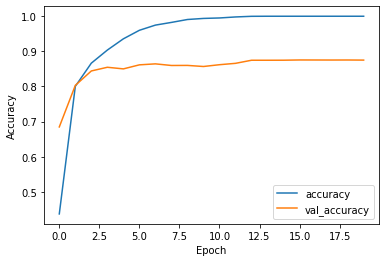

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

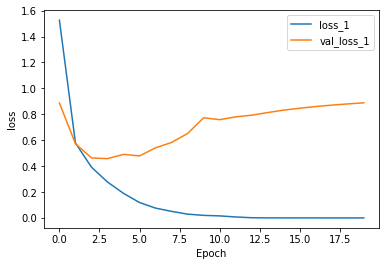

In [11]:
plt.plot(history.history['loss'], label='loss_1')
plt.plot(history.history['val_loss'], label = 'val_loss_1')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [0]:
model_freeze = models.Sequential()
conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in conv.layers:
  layer.trainable = False
  model_freeze.add(layer)
  model_freeze.add(layers.Activation('elu'))
model_freeze.add(layers.GlobalAveragePooling2D())
model_freeze.add(layers.Dense(10, activation='softmax'))

In [14]:
model_freeze.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation (Activation)      (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)       

In [13]:
NAG = optimizers.SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)

batch = 128
epoch = 20

model_freeze.compile(optimizer= NAG ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stop = callbacks.EarlyStopping(monitor='loss', patience=3, verbose=2)

history_freeze = model_freeze.fit(train_images, train_labels,
                    epochs=epoch, verbose = 2,
                    batch_size=batch,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/20
391/391 - 19s - loss: 1.6480 - accuracy: 0.4347 - val_loss: 1.4841 - val_accuracy: 0.4922
Epoch 2/20
391/391 - 19s - loss: 1.4236 - accuracy: 0.5137 - val_loss: 1.4097 - val_accuracy: 0.5130
Epoch 3/20
391/391 - 18s - loss: 1.3685 - accuracy: 0.5333 - val_loss: 1.3684 - val_accuracy: 0.5278
Epoch 4/20
391/391 - 19s - loss: 1.3371 - accuracy: 0.5418 - val_loss: 1.3496 - val_accuracy: 0.5344
Epoch 5/20
391/391 - 19s - loss: 1.3174 - accuracy: 0.5493 - val_loss: 1.3336 - val_accuracy: 0.5395
Epoch 6/20
391/391 - 19s - loss: 1.3017 - accuracy: 0.5552 - val_loss: 1.3240 - val_accuracy: 0.5411
Epoch 7/20
391/391 - 19s - loss: 1.2895 - accuracy: 0.5590 - val_loss: 1.3165 - val_accuracy: 0.5451
Epoch 8/20
391/391 - 19s - loss: 1.2808 - accuracy: 0.5613 - val_loss: 1.3049 - val_accuracy: 0.5469
Epoch 9/20
391/391 - 19s - loss: 1.2723 - accuracy: 0.5649 - val_loss: 1.2994 - val_accuracy: 0.5480
Epoch 10/20
391/391 - 19s - loss: 1.2653 - accuracy: 0.5673 - val_loss: 1.2970 - val_accura

313/313 - 6s - loss: 1.2682 - accuracy: 0.5597


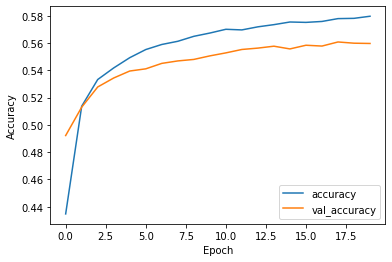

In [17]:
plt.plot(history_freeze.history['accuracy'], label='accuracy')
plt.plot(history_freeze.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model_freeze.evaluate(test_images,  test_labels, verbose=2)

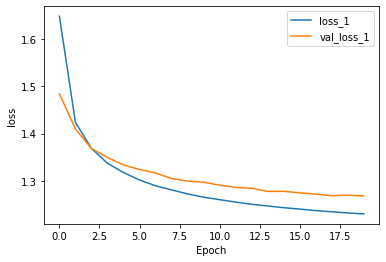

In [18]:
plt.plot(history_freeze.history['loss'], label='loss_1')
plt.plot(history_freeze.history['val_loss'], label = 'val_loss_1')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')